# 033_TD_qlearning_FrozenLake
## Q-Learning (off-policy TD control) for estimating $\pi = \pi^*$

- 최적 행동가치 함수 $q^*$를 직접 근사하여 최적 정책 발견

```
LEFT - 0, DOWN - 1, RIGHT - 2, UP - 3

SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
```

<img src="https://t1.daumcdn.net/cfile/tistory/257E064858A982E612" width=400 />

In [ ]:
import gym 
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

#Algorithm parameters: step size alpha, small e>0
GAMMA = 0.99
ALPHA = 0.9
epsilon = 0.3
num_episodes = 10_000 

stochastic = False
if stochastic:
  env = gym.make('FrozenLake-v0')
else:
  env = gym.make('FrozenLake-v0', is_slippery=False)
  
num_actions = env.action_space.n 
num_actions

4

<img src="https://blog.kakaocdn.net/dn/Xmyub/btqydBg48hF/4ZwGr1XshIOWO10P95WZKK/img.jpg" />

In [ ]:
win_pct = []
scores = []
    
# Initialize Q(s,a) arbitrarily except that Q(terminal, .)=0
Q = defaultdict(lambda: np.zeros(num_actions))

# Loop for each episode:
for episode in range(num_episodes):
    # Initialize S
    s = env.reset()  
    # Loop for each step of episode:
    score = 0
    while True:       
        # Choose A from S using policy derived from Q (eg. e-greedy)
        # behavior policy : e-greedy
        if np.random.rand() < epsilon:
            a = env.action_space.sample()
        else : 
            a = np.argmax(Q[s])
            
        # Take action A, observe R, S'
        s_, r, done, _ = env.step(a)  
        score += r
            
        #Q(S,A) <- Q(S,A) + alpha[R + gamma*max_aQ(S',a) - Q(S, A)]
        #자신이 따르는 정책에 상관없이 최적 행동가치함수 q*를 직접 근사
        # target policy : greedy policy
        Q[s][a] = Q[s][a] + ALPHA * (r + GAMMA * np.max(Q[s_]) - Q[s][a])
        # S <-- S'
        s = s_
        # until S is terminal
        if done:
            break
        
    scores.append(score)
        
    if episode % 1000 and episode > 0.8 * num_episodes:
        average = np.mean(scores[-100:])
        win_pct.append(average)
        print(f"episode {episode} completed... 최근 100 episode 평균 score = {average}")

episode 8001 completed... 최근 100 episode 평균 score = 0.7
episode 8002 completed... 최근 100 episode 평균 score = 0.69
episode 8003 completed... 최근 100 episode 평균 score = 0.69
episode 8004 completed... 최근 100 episode 평균 score = 0.7
episode 8005 completed... 최근 100 episode 평균 score = 0.7
episode 8006 completed... 최근 100 episode 평균 score = 0.69
episode 8007 completed... 최근 100 episode 평균 score = 0.69
episode 8008 completed... 최근 100 episode 평균 score = 0.7
episode 8009 completed... 최근 100 episode 평균 score = 0.69
episode 8010 completed... 최근 100 episode 평균 score = 0.68
episode 8011 completed... 최근 100 episode 평균 score = 0.67
episode 8012 completed... 최근 100 episode 평균 score = 0.68
episode 8013 completed... 최근 100 episode 평균 score = 0.69
episode 8014 completed... 최근 100 episode 평균 score = 0.69
episode 8015 completed... 최근 100 episode 평균 score = 0.68
episode 8016 completed... 최근 100 episode 평균 score = 0.68
episode 8017 completed... 최근 100 episode 평균 score = 0.68
episode 8018 completed... 최근 100 ep

episode 8415 completed... 최근 100 episode 평균 score = 0.6
episode 8416 completed... 최근 100 episode 평균 score = 0.6
episode 8417 completed... 최근 100 episode 평균 score = 0.61
episode 8418 completed... 최근 100 episode 평균 score = 0.62
episode 8419 completed... 최근 100 episode 평균 score = 0.62
episode 8420 completed... 최근 100 episode 평균 score = 0.62
episode 8421 completed... 최근 100 episode 평균 score = 0.63
episode 8422 completed... 최근 100 episode 평균 score = 0.64
episode 8423 completed... 최근 100 episode 평균 score = 0.64
episode 8424 completed... 최근 100 episode 평균 score = 0.65
episode 8425 completed... 최근 100 episode 평균 score = 0.64
episode 8426 completed... 최근 100 episode 평균 score = 0.65
episode 8427 completed... 최근 100 episode 평균 score = 0.65
episode 8428 completed... 최근 100 episode 평균 score = 0.66
episode 8429 completed... 최근 100 episode 평균 score = 0.67
episode 8430 completed... 최근 100 episode 평균 score = 0.67
episode 8431 completed... 최근 100 episode 평균 score = 0.67
episode 8432 completed... 최근 100 

episode 8809 completed... 최근 100 episode 평균 score = 0.64
episode 8810 completed... 최근 100 episode 평균 score = 0.64
episode 8811 completed... 최근 100 episode 평균 score = 0.64
episode 8812 completed... 최근 100 episode 평균 score = 0.63
episode 8813 completed... 최근 100 episode 평균 score = 0.63
episode 8814 completed... 최근 100 episode 평균 score = 0.62
episode 8815 completed... 최근 100 episode 평균 score = 0.62
episode 8816 completed... 최근 100 episode 평균 score = 0.61
episode 8817 completed... 최근 100 episode 평균 score = 0.61
episode 8818 completed... 최근 100 episode 평균 score = 0.6
episode 8819 completed... 최근 100 episode 평균 score = 0.6
episode 8820 completed... 최근 100 episode 평균 score = 0.59
episode 8821 completed... 최근 100 episode 평균 score = 0.6
episode 8822 completed... 최근 100 episode 평균 score = 0.6
episode 8823 completed... 최근 100 episode 평균 score = 0.6
episode 8824 completed... 최근 100 episode 평균 score = 0.61
episode 8825 completed... 최근 100 episode 평균 score = 0.62
episode 8826 completed... 최근 100 epi

episode 9226 completed... 최근 100 episode 평균 score = 0.64
episode 9227 completed... 최근 100 episode 평균 score = 0.64
episode 9228 completed... 최근 100 episode 평균 score = 0.63
episode 9229 completed... 최근 100 episode 평균 score = 0.64
episode 9230 completed... 최근 100 episode 평균 score = 0.64
episode 9231 completed... 최근 100 episode 평균 score = 0.63
episode 9232 completed... 최근 100 episode 평균 score = 0.63
episode 9233 completed... 최근 100 episode 평균 score = 0.63
episode 9234 completed... 최근 100 episode 평균 score = 0.63
episode 9235 completed... 최근 100 episode 평균 score = 0.63
episode 9236 completed... 최근 100 episode 평균 score = 0.63
episode 9237 completed... 최근 100 episode 평균 score = 0.62
episode 9238 completed... 최근 100 episode 평균 score = 0.61
episode 9239 completed... 최근 100 episode 평균 score = 0.61
episode 9240 completed... 최근 100 episode 평균 score = 0.6
episode 9241 completed... 최근 100 episode 평균 score = 0.61
episode 9242 completed... 최근 100 episode 평균 score = 0.61
episode 9243 completed... 최근 100

episode 9680 completed... 최근 100 episode 평균 score = 0.68
episode 9681 completed... 최근 100 episode 평균 score = 0.67
episode 9682 completed... 최근 100 episode 평균 score = 0.67
episode 9683 completed... 최근 100 episode 평균 score = 0.67
episode 9684 completed... 최근 100 episode 평균 score = 0.67
episode 9685 completed... 최근 100 episode 평균 score = 0.67
episode 9686 completed... 최근 100 episode 평균 score = 0.66
episode 9687 completed... 최근 100 episode 평균 score = 0.65
episode 9688 completed... 최근 100 episode 평균 score = 0.65
episode 9689 completed... 최근 100 episode 평균 score = 0.66
episode 9690 completed... 최근 100 episode 평균 score = 0.66
episode 9691 completed... 최근 100 episode 평균 score = 0.66
episode 9692 completed... 최근 100 episode 평균 score = 0.66
episode 9693 completed... 최근 100 episode 평균 score = 0.65
episode 9694 completed... 최근 100 episode 평균 score = 0.65
episode 9695 completed... 최근 100 episode 평균 score = 0.65
episode 9696 completed... 최근 100 episode 평균 score = 0.65
episode 9697 completed... 최근 10

Deterministic
GAMMA = 0.99, epsilon = 0.3, ALPHA = 0.9


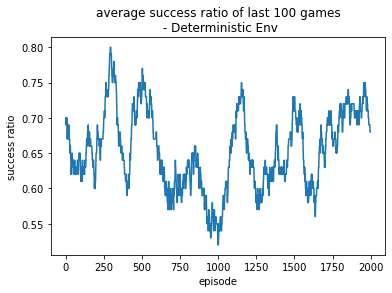

In [ ]:
print("Stochastic" if stochastic else "Deterministic")
print("GAMMA = {}, epsilon = {}, ALPHA = {}".format(GAMMA, epsilon, ALPHA))

plt.plot(win_pct)
plt.xlabel('episode')
plt.ylabel('success ratio')
plt.title('average success ratio of last 100 games\n - {}'
          .format('Stochastic Env' if stochastic else 'Deterministic Env'))
plt.show()

In [ ]:
#optimal policy 출력
WIDTH = 4
HEIGHT = 4
GOAL = (3, 3)

print(
    """
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
    """)
print("Optimal Action =")
for i in [0, 4, 8, 12]:
    print([v.argmax() for k, v in sorted(Q.items())][i:i+4])


SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
    
Optimal Action =
[1, 2, 1, 0]
[1, 0, 1, 0]
[2, 1, 1, 0]
[0, 2, 2, 0]
